In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
le=LabelEncoder()
from sklearn.metrics import r2_score, classification_report, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
Churn_data=pd.read_csv('customer churn.csv')

In [5]:
Churn_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
Churn_data.shape

(7043, 21)

In [7]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA

In [8]:
Churn_data.size

147903

In [9]:
Churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
Churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
Churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
Churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
print(min(Churn_data.tenure))
print(Churn_data.tenure.mean())
print(max(Churn_data.tenure))


0
32.37114865824223
72


In [14]:
print(min(Churn_data.MonthlyCharges))
print(Churn_data.MonthlyCharges.mean())
print(max(Churn_data.MonthlyCharges))


18.25
64.76169246059918
118.75


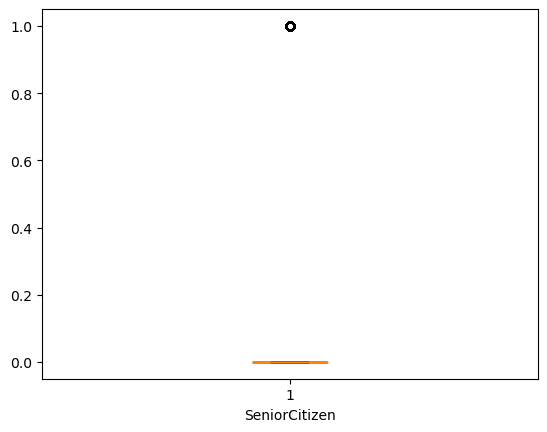

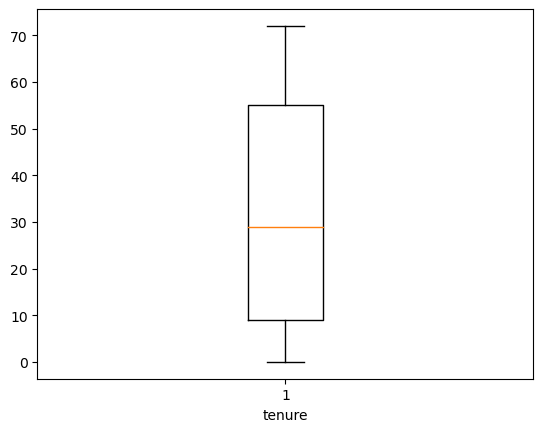

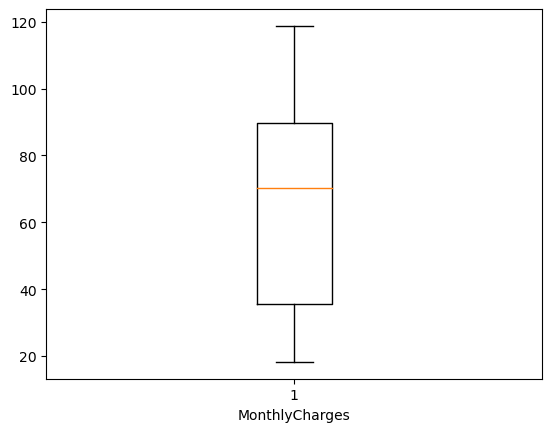

In [15]:

for i in Churn_data.columns:
  if Churn_data[i].dtypes != object:
    plt.boxplot(Churn_data[i])
    plt.xlabel(i)
    plt.show()

# DATA ANALYSIS AND MANIPULATION

In [16]:
print(min(Churn_data.tenure))
print(Churn_data.tenure.mean())
print(max(Churn_data.tenure))


0
32.37114865824223
72


In [17]:
print(min(Churn_data.MonthlyCharges))
print(Churn_data.MonthlyCharges.mean())
print(max(Churn_data.MonthlyCharges))

18.25
64.76169246059918
118.75


In [18]:
senior_male_electronics = Churn_data[(Churn_data['gender'] == 'Male') & (Churn_data['SeniorCitizen'] == 1) &
                               (Churn_data['PaymentMethod'] == 'Electronic check')]

senior_male_electronics.count().unique().sum()

298

In [19]:
#Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [20]:
customer_total_tenure=Churn_data[(Churn_data['tenure']>70) | (Churn_data['MonthlyCharges']>100)]
customer_total_tenure.count().unique().sum()

1259

In [21]:
#Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ 
#& store the result in ‘two_mail_yes’

In [22]:
Two_mail_yes=Churn_data[(Churn_data['Contract']=='Two year') & (Churn_data['PaymentMethod']=='Mailed check') & (Churn_data['Churn']=='Yes')]
Two_mail_yes.count().unique().sum()

3

In [23]:
#Store number 333 customer in variable Customer_333
Customer_333=Churn_data.sample(332)
Customer_333.sample(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6631,2108-GLPQB,Male,0,Yes,No,25,Yes,Yes,DSL,No,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),55.55,1405.3,No


In [24]:
#Churn data Partition
Churn_data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [25]:
Churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Analysis and Data Visualization

<Axes: xlabel='Churn', ylabel='tenure'>

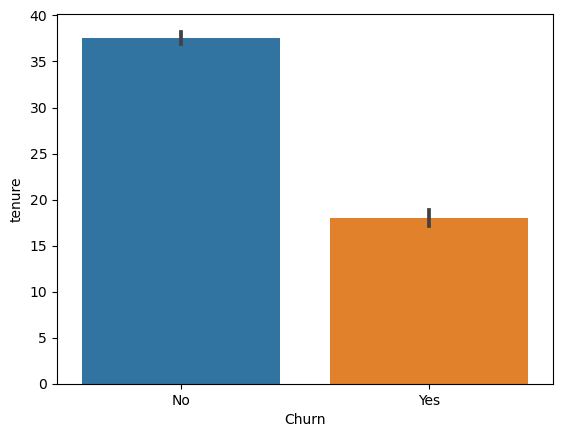

In [26]:
sns.barplot(data=Churn_data, y='tenure', x='Churn')


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

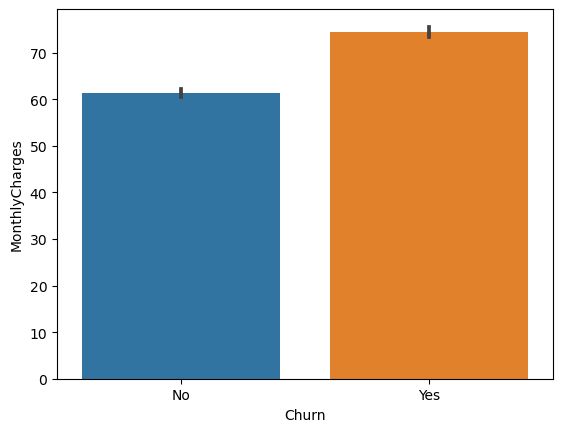

In [27]:
sns.barplot(data=Churn_data, y='MonthlyCharges', x='Churn')

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

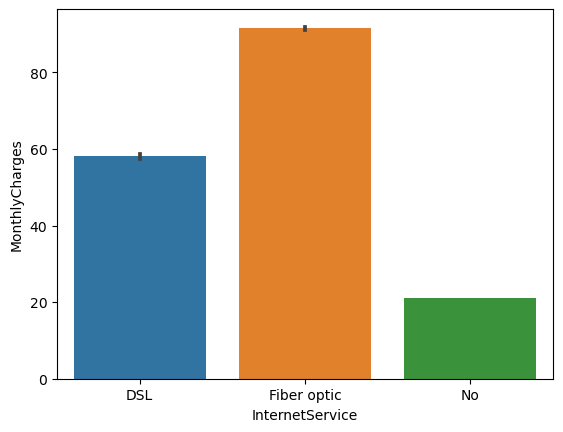

In [28]:
sns.barplot(data=Churn_data, y='MonthlyCharges', x='InternetService')

In [29]:
x=Churn_data.Contract.value_counts().index
y=Churn_data.Contract.value_counts()

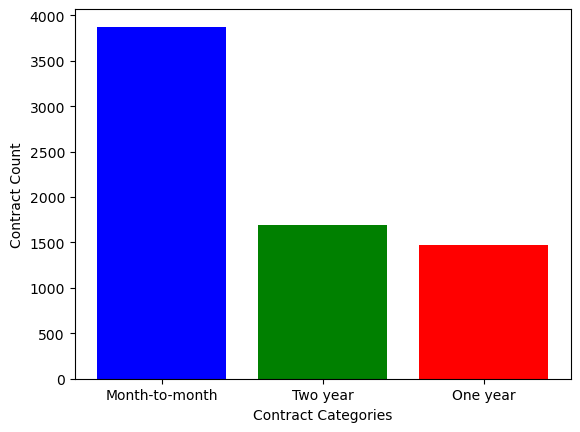

<Figure size 640x480 with 0 Axes>

In [30]:
plt.bar(x,y, color=["Blue",'green', 'red', 'orange'])
plt.xlabel('Contract Categories')
plt.ylabel('Contract Count')
plt.show()
plt.tight_layout()

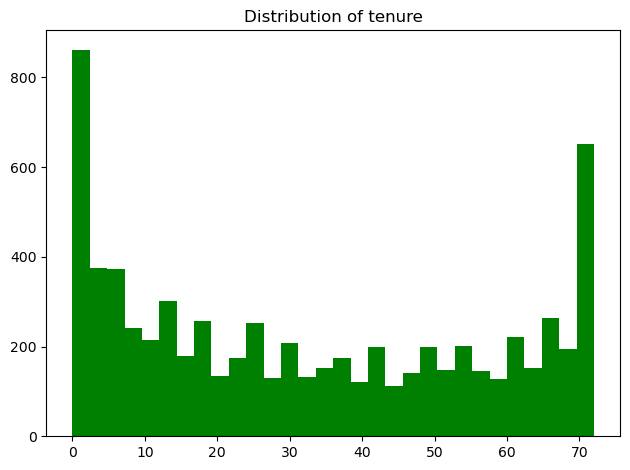

In [31]:
plt.title('Distribution of tenure')
plt.hist(Churn_data.tenure, bins = 30, color = 'green')
plt.tight_layout();

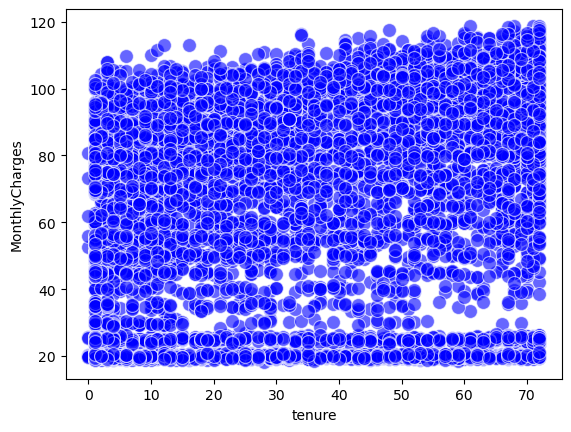

<Figure size 640x480 with 0 Axes>

In [32]:
sns.scatterplot(x=Churn_data.tenure, y=Churn_data.MonthlyCharges, color='blue', s=100, alpha=0.6)
plt.show()
plt.tight_layout()

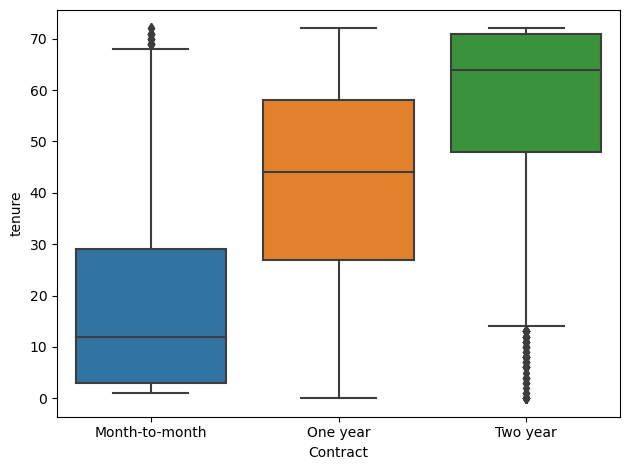

In [33]:
sns.boxplot(x = 'Contract' , y = 'tenure', data = Churn_data)
plt.tight_layout();

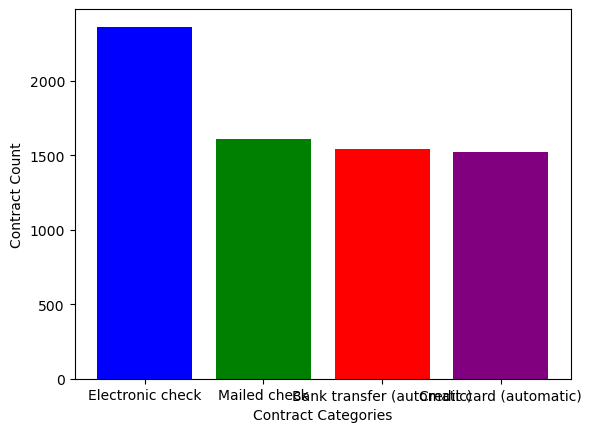

<Figure size 640x480 with 0 Axes>

In [34]:
x1=Churn_data.PaymentMethod.value_counts().index
y1=Churn_data.PaymentMethod.value_counts()

plt.bar(x1,y1, color=["Blue",'green', 'red','purple'])
plt.xlabel('Contract Categories')
plt.ylabel('Contract Count')
plt.show()
plt.tight_layout()

# Converting categorical variables to dummy using get_dummies

In [65]:
X=Churn_data.drop(['Churn','TotalCharges', 'customerID', 'gender'], axis=1)
y=le.fit_transform(Churn_data['Churn'])

In [66]:
df_dummies=pd.get_dummies(X.select_dtypes(include=['object']))
df_dummies

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,True,False,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,True,False,True,False,False,True,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,True,False,True,False,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
3,True,False,True,False,True,False,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,True,False,True,False,False,True,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,False,True,False,True,False,False,True,True,...,True,False,True,False,False,True,False,False,False,True
7039,False,True,False,True,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,False,True,False,True,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,False,True,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [67]:
X=pd.concat([X.drop(X.select_dtypes(include=['object']).columns, axis=1), df_dummies],axis=1)

In [68]:
y.shape

(7043,)

In [69]:
X

,SeniorCitizen,tenure,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,False,True,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,True,False,True,False,True,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,False,True,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True



Selected Features by RFE: Index(['InternetService_Fiber optic', 'OnlineSecurity_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


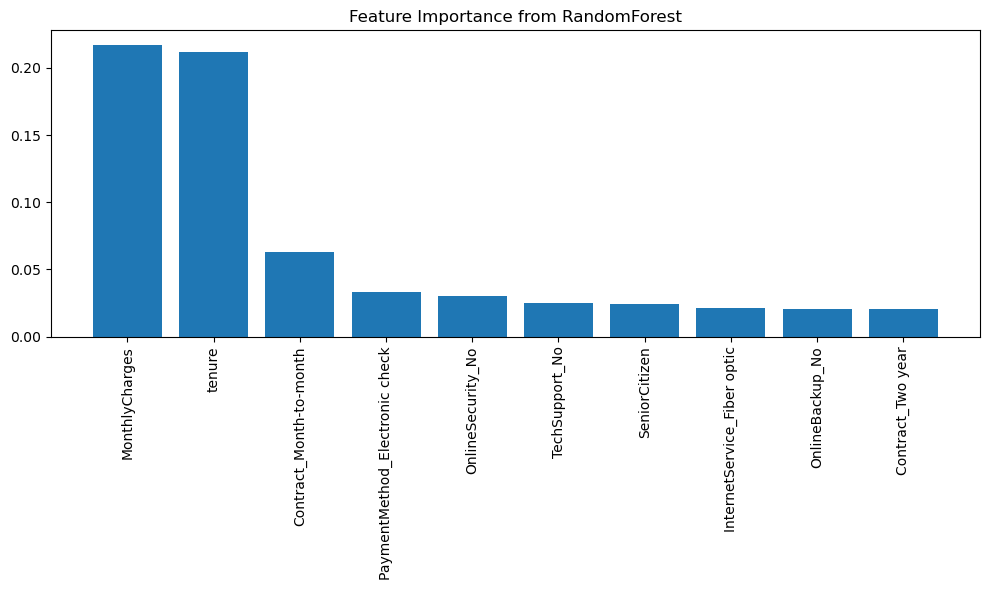


Top 10 Most Important Features from RandomForest:
 Index(['MonthlyCharges', 'tenure', 'Contract_Month-to-month',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No', 'TechSupport_No',
       'SeniorCitizen', 'InternetService_Fiber optic', 'OnlineBackup_No',
       'Contract_Two year'],
      dtype='object')


In [73]:
# a. Recursive Feature Elimination (RFE) using Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X, y)
# Print the selected features by RFE
selected_rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:", selected_rfe_features)

# b. Feature Importance using RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from RandomForest')
plt.bar(range(10), importances[indices][:10], align='center')
plt.xticks(range(10), X.columns[indices][:10], rotation=90)
plt.tight_layout()
plt.show()

# Print the top 10 most important features
print("\nTop 10 Most Important Features from RandomForest:\n", X.columns[indices][:10])

In [76]:
y1

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [79]:
y = Churn_data[['Churn']]
x = Churn_data[['MonthlyCharges', 'tenure']]

In [80]:
x_test, x_train, y_test, y_train= train_test_split(x,y1, test_size=0.35,random_state=20)

# Building Model


In [82]:
LM=LogisticRegression()

In [146]:
LM.fit(x_train, y_train)

LogisticRegression()

In [147]:
LM_predictions = LM.predict(x_test)

In [149]:
accuracy_score(LM_predictions,y_test)

0.7804238584225475

In [151]:
confusion_matrix(LM_predictions,y_test)

array([[3057,  721],
       [ 284,  515]], dtype=int64)

In [152]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your y_true and y_pred already
def plot_confusion_matrix(y_true, y_pred, class_names=None):
   # Create confusion matrix
   cm = confusion_matrix(y_true, y_pred)
   
   # Create figure and axes
   plt.figure(figsize=(8,6))
   
   # Create heatmap
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=class_names if class_names else 'auto',
               yticklabels=class_names if class_names else 'auto')
   
   # Add labels
   plt.title('Confusion Matrix')
   plt.ylabel('True Label')
   plt.xlabel('Predicted Label')
   
   # Show plot
   plt.show()
   
   # Print classification report
   print("\nClassification Report:")
   print(classification_report(y_true, y_pred))


# Alternative detailed version with more metrics:
def detailed_confusion_matrix(y_true, y_pred):
   # Calculate confusion matrix
   cm = confusion_matrix(y_true, y_pred)
   
   # Extract values
   TN, FP, FN, TP = cm.ravel()
   
   # Calculate metrics
   accuracy = (TP + TN) / (TP + TN + FP + FN)
   precision = TP / (TP + FP)
   recall = TP / (TP + FN)
   specificity = TN / (TN + FP)
   f1 = 2 * (precision * recall) / (precision + recall)
   
   # Print results
   print("Confusion Matrix Analysis")
   print("-----------------------")
   print(f"True Positives (TP): {TP}")
   print(f"True Negatives (TN): {TN}")
   print(f"False Positives (FP): {FP}")
   print(f"False Negatives (FN): {FN}")
   print("\nMetrics:")
   print(f"Accuracy: {accuracy:.4f}")
   print(f"Precision: {precision:.4f}")
   print(f"Recall (Sensitivity): {recall:.4f}")
   print(f"Specificity: {specificity:.4f}")
   print(f"F1 Score: {f1:.4f}")
   
   # Create visualization
   plt.figure(figsize=(10,8))
   
   # Plot heatmap
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Negative', 'Positive'],
               yticklabels=['Negative', 'Positive'])
   
   plt.title('Confusion Matrix Heatmap')
   plt.ylabel('True Label')
   plt.xlabel('Predicted Label')
   plt.show()

# Example usage with sklearn datasets:
"""
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot confusion matrix
detailed_confusion_matrix(y_test, y_pred)
"""

Confusion Matrix Analysis
-----------------------
True Positives (TP): 515
True Negatives (TN): 3057
False Positives (FP): 284
False Negatives (FN): 721

Metrics:
Accuracy: 0.7804
Precision: 0.6446
Recall (Sensitivity): 0.4167
Specificity: 0.9150
F1 Score: 0.5061


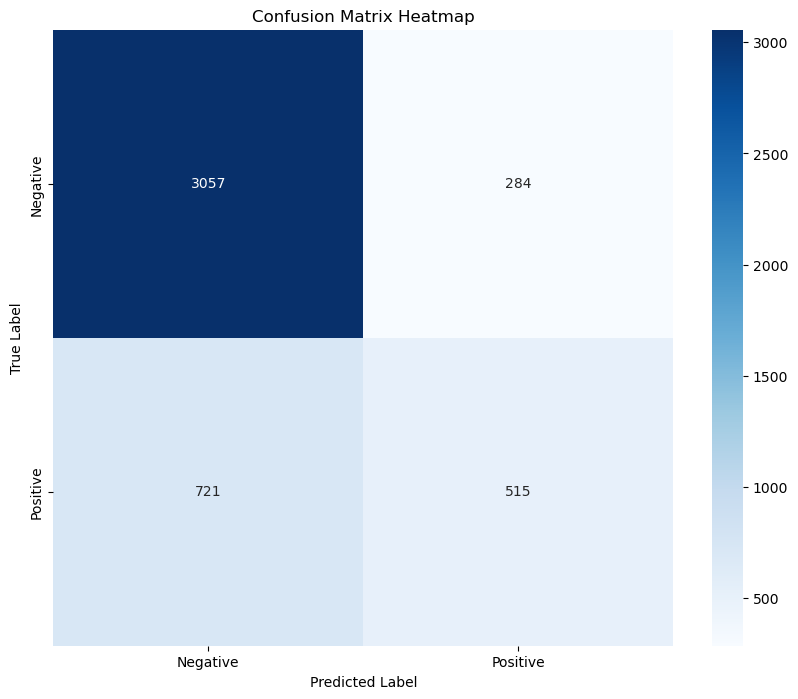

In [156]:

# Plot confusion matrix
detailed_confusion_matrix(y_test, LM_predictions)